# First, let’s load all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataSet

In [2]:
df=pd.read_csv("loan_tap.csv")
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


## 1. Define problem statement

 The task involves determining whether a credit line (loan) should be extended to an individual,

and if so, what the repayment terms should be based on their attributes. You are provided with a set of features

(e.g., loan_amount, income, credit history, etc.) and the target variable (loan_status, whether the loan was paid or not).

The goal is to understand the data through exploratory analysis and use it to make informed business decisions

## 2.. perform Exploratory Data Analysis (20 points)

### a. Observations on shape of data and data types of all attributes

In [3]:
print(f'shape of  the data {df.shape}')

shape of  the data (396030, 27)


In [4]:
print(f'Data Types Of All Attributes\n\n{df.dtypes}')

Data Types Of All Attributes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object


### b. Check for missing value (if any)

In [5]:
print(f'Missing Value\n\n{df.isnull().sum()}')

Missing Value

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64


This dataset contains missing values.

### c. Display the statistical summary

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## d. Univariate Analysis and Bivariate Analysis of all the attributes

In [7]:
numerical_columns = df.select_dtypes(include=['float','int64'])
categorical_columns =df.select_dtypes(include='object')

## Firstly, I performed Univariate Analysis

### a. On range of attributes

In [8]:
for i in numerical_columns:
    min_value=df[i].min()
    max_value=df[i].max()
    range_value=max_value - min_value
    print(f"Column: {i}, Min: {min_value}, Max: {max_value}, Range: {range_value}")

Column: loan_amnt, Min: 500.0, Max: 40000.0, Range: 39500.0
Column: int_rate, Min: 5.32, Max: 30.99, Range: 25.669999999999998
Column: installment, Min: 16.08, Max: 1533.81, Range: 1517.73
Column: annual_inc, Min: 0.0, Max: 8706582.0, Range: 8706582.0
Column: dti, Min: 0.0, Max: 9999.0, Range: 9999.0
Column: open_acc, Min: 0.0, Max: 90.0, Range: 90.0
Column: pub_rec, Min: 0.0, Max: 86.0, Range: 86.0
Column: revol_bal, Min: 0.0, Max: 1743266.0, Range: 1743266.0
Column: revol_util, Min: 0.0, Max: 892.3, Range: 892.3
Column: total_acc, Min: 2.0, Max: 151.0, Range: 149.0
Column: mort_acc, Min: 0.0, Max: 34.0, Range: 34.0
Column: pub_rec_bankruptcies, Min: 0.0, Max: 8.0, Range: 8.0


##### This is the range of all numerical attributes. First, I separated all numerical columns into one variable named 'numerical_columns'.
##### After that, I used a for loop to calculate the minimum and maximum values of each column. Then, I got the range of each attribute.
##### Finally,I printed the minimum, maximum, and range using the print function.

## b.Outliers of various attributes

## First, we identify the outliers for numerical columns

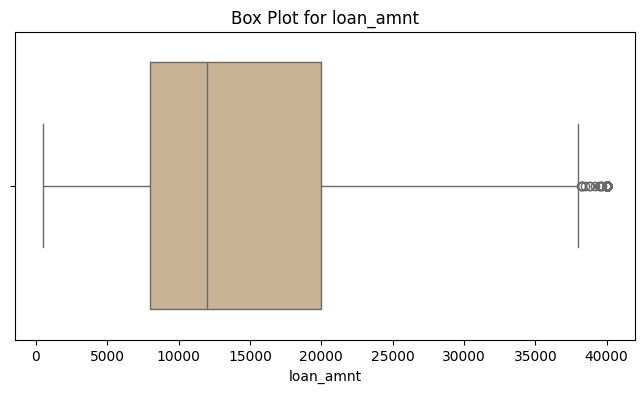

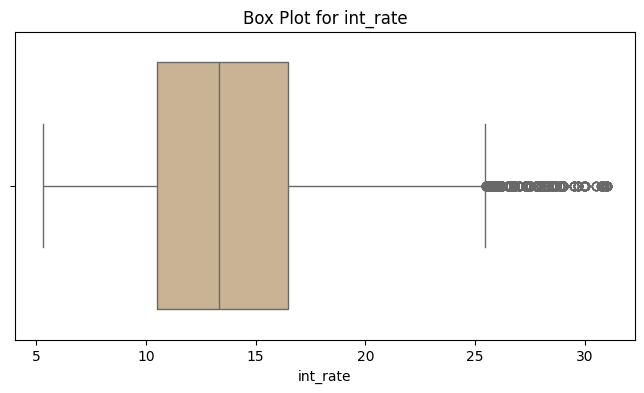

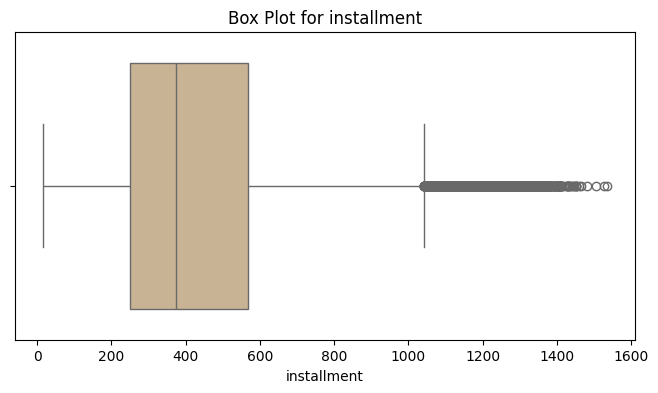

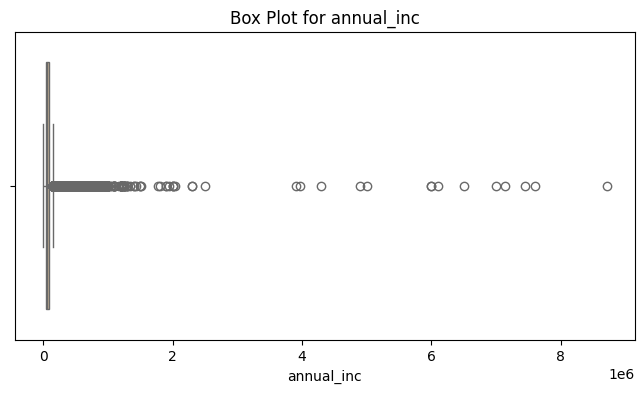

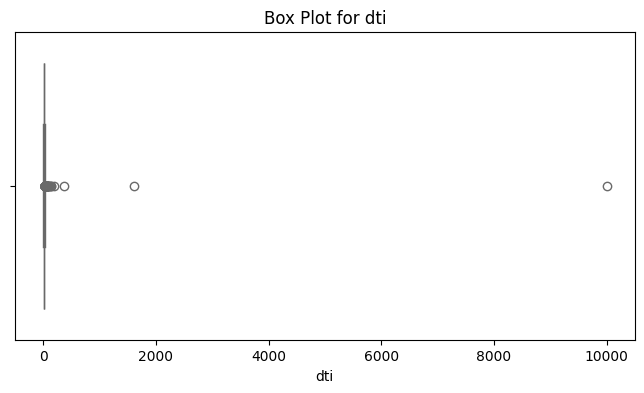

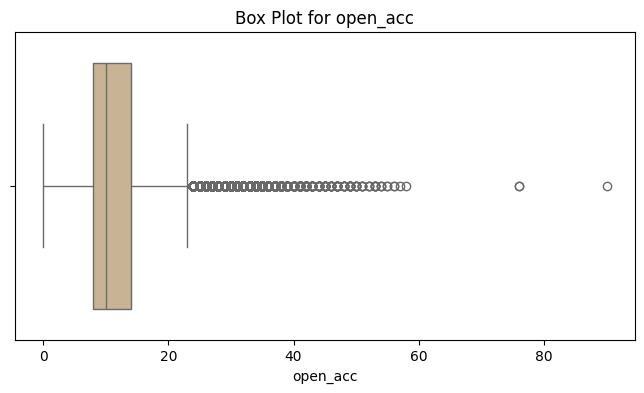

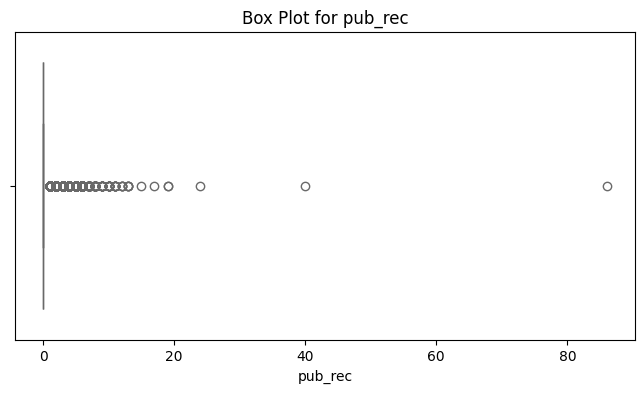

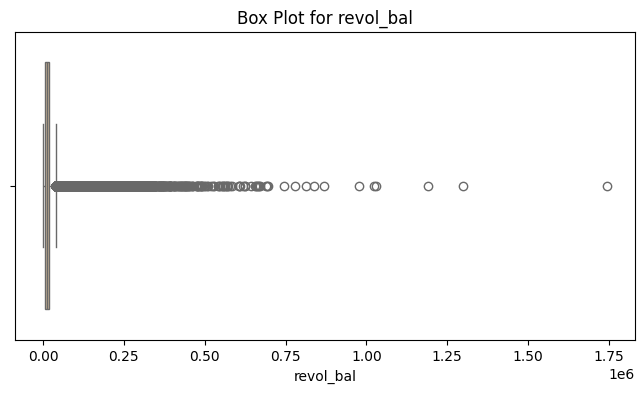

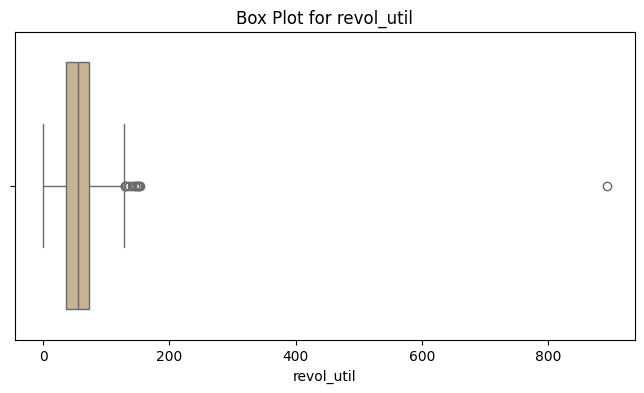

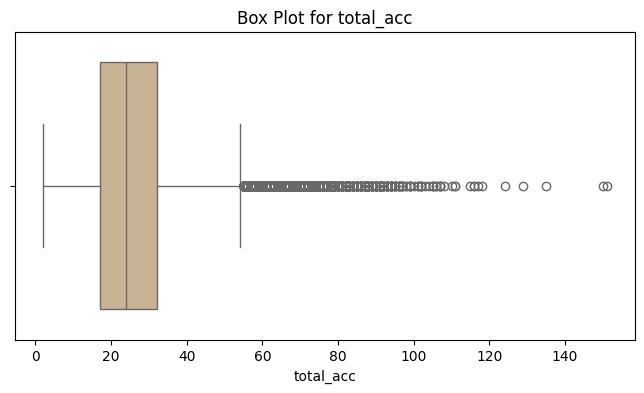

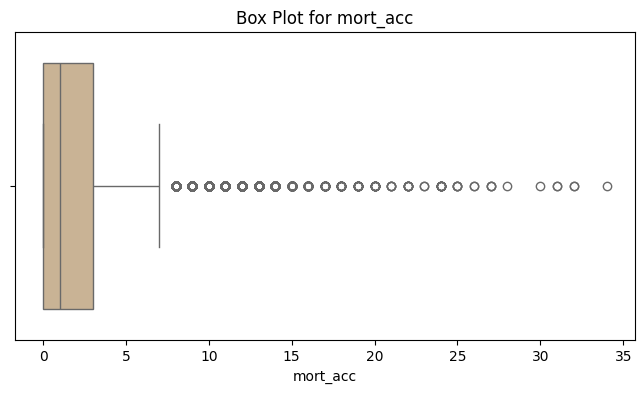

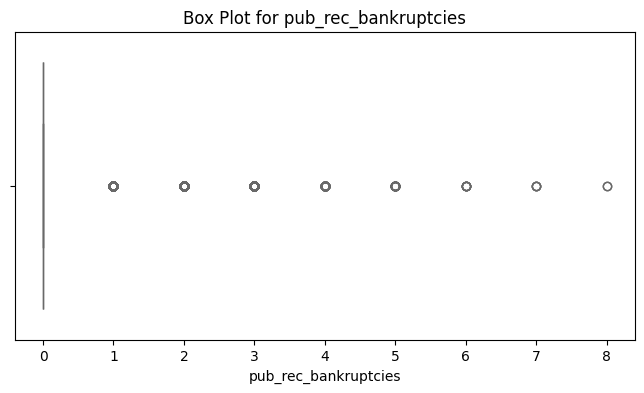

In [9]:
for col in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col],color='tan')
        plt.title(f"Box Plot for {col}")
        plt.show()

##### We analyze the outliers of numerical columns using box plots. Outliers will be displayed as individual points outside the 'whiskers' of the box plot

##  After that ,we identify the outliers for categorical column

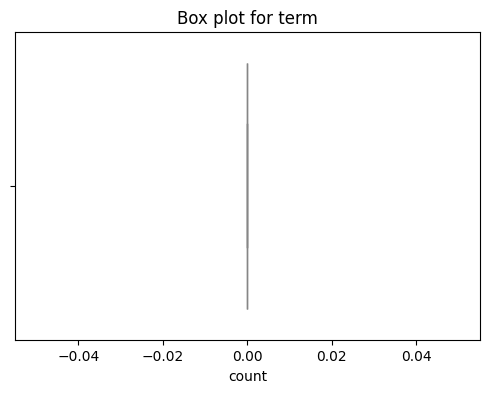

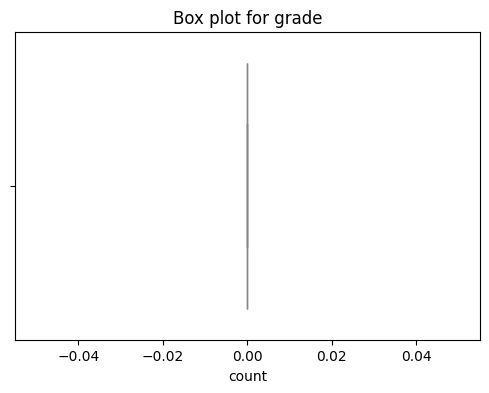

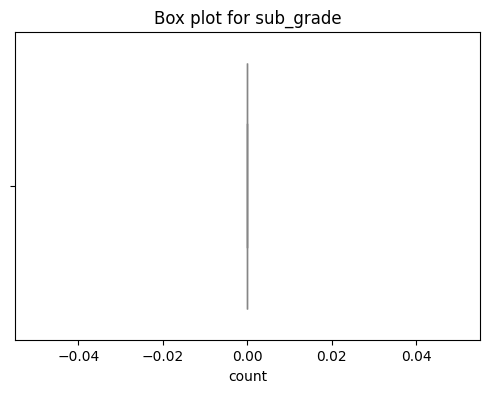

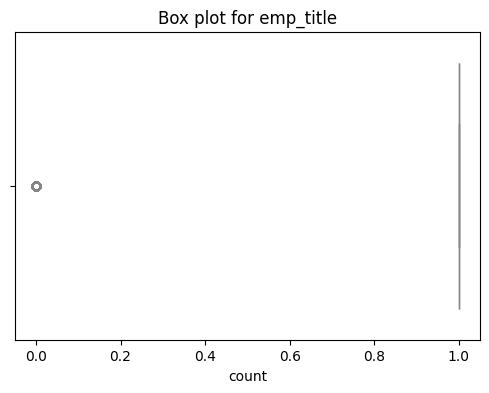

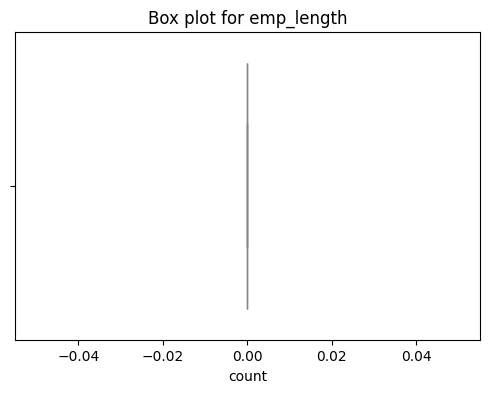

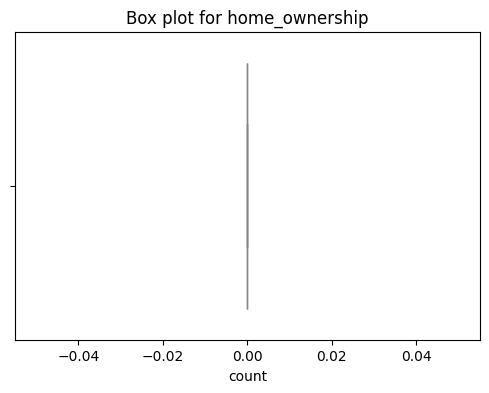

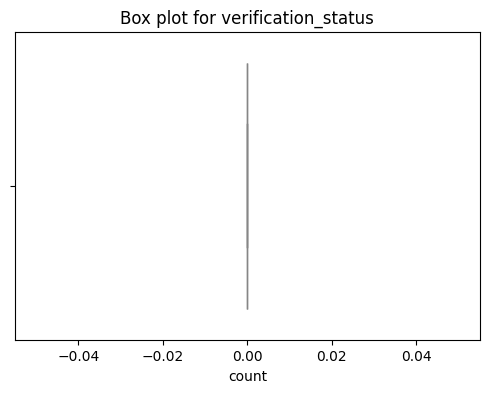

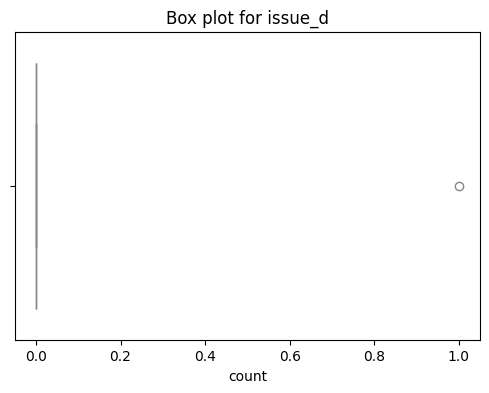

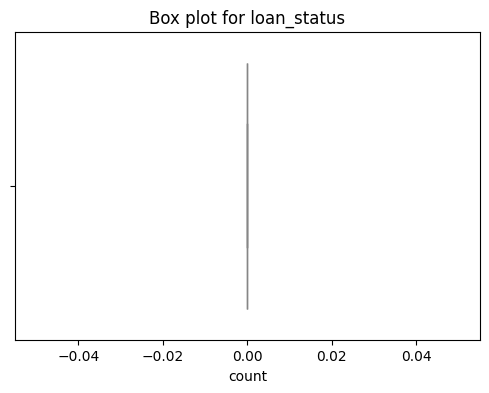

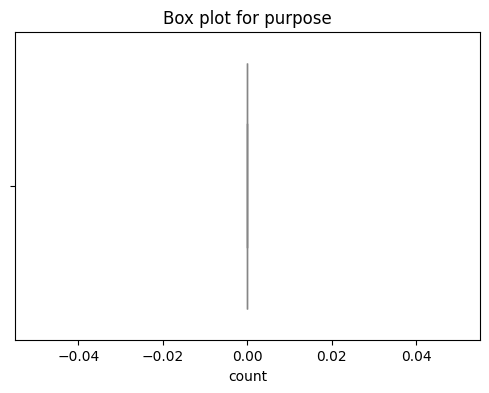

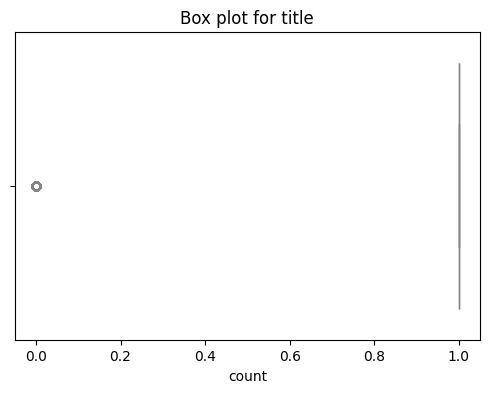

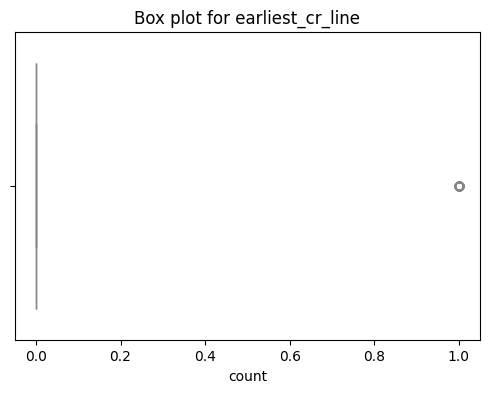

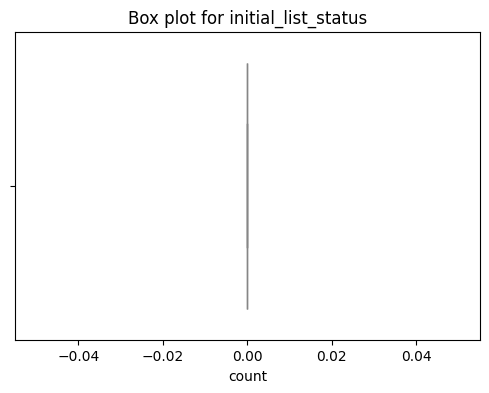

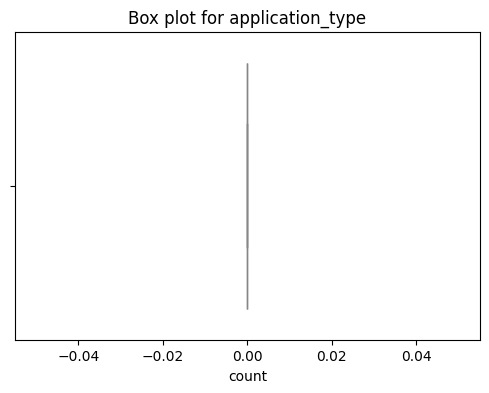

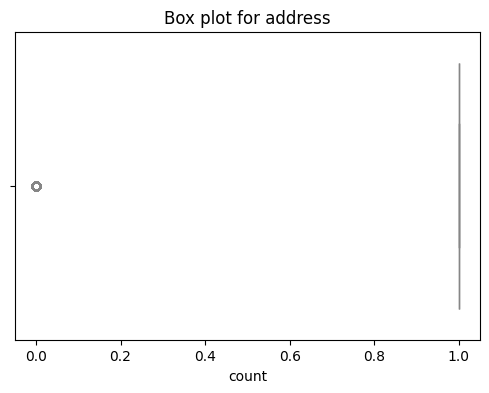

In [10]:
for column in categorical_columns:
    plt.figure(figsize=(6,4))
    threshold=3
    sns.boxplot(x=df[column].value_counts()< threshold,color='pink')
    plt.title(f"Box plot for {column}")
    plt.show()  

##### We analyze the outliers of categorical columns using box plots. Outliers will be displayed as individual points outside the 'whiskers' of the box plot

## c. On the distribution of the variables

#### First, we identify the distribution for numerical columns

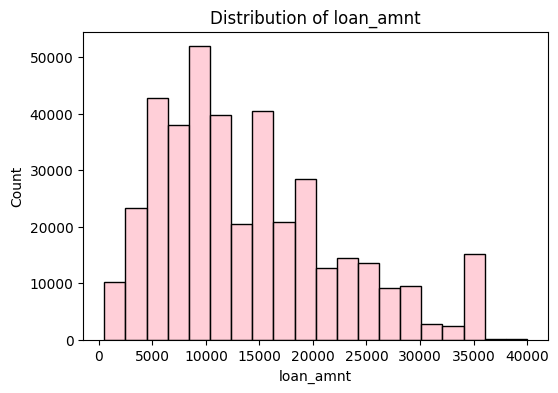

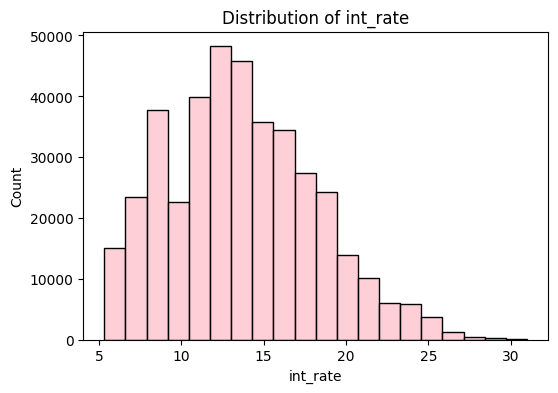

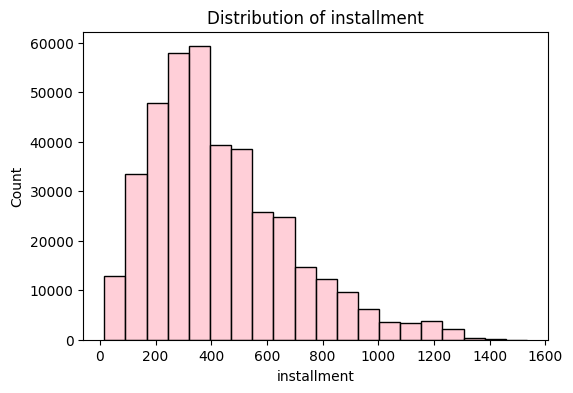

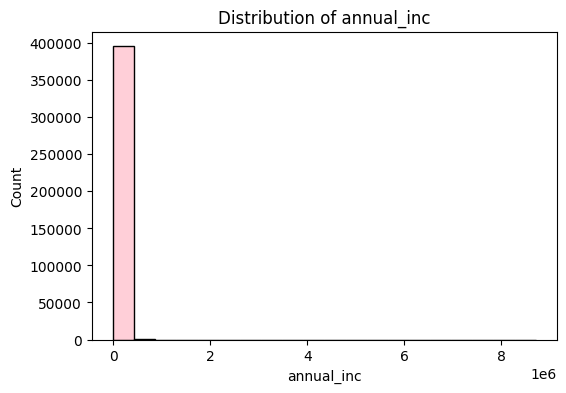

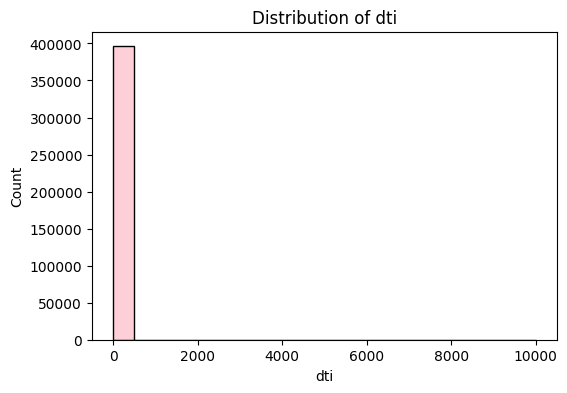

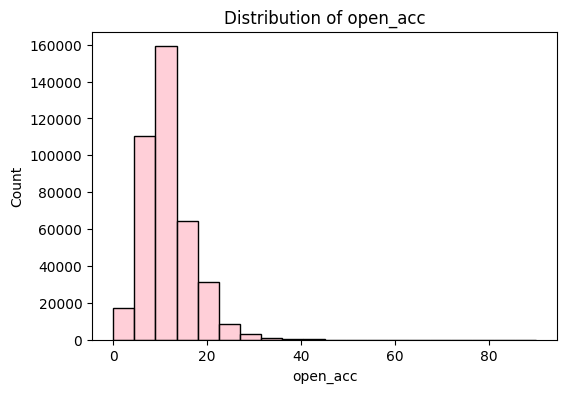

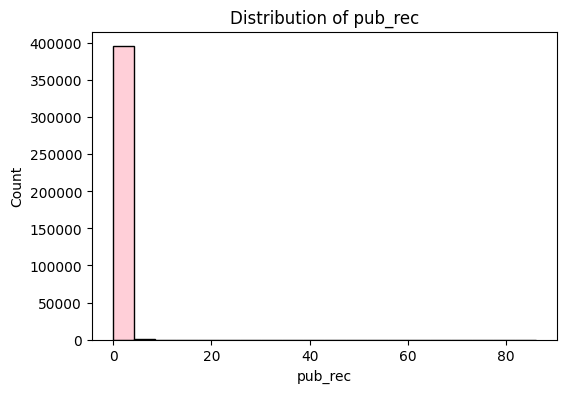

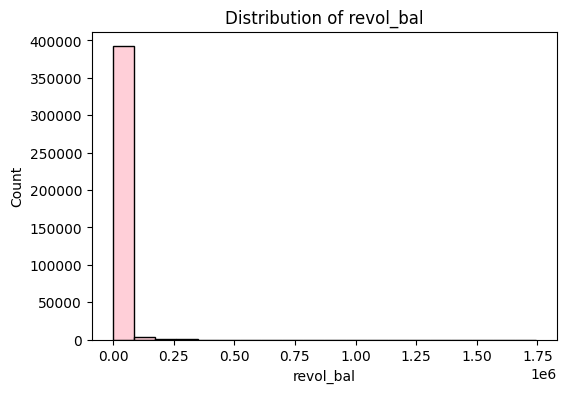

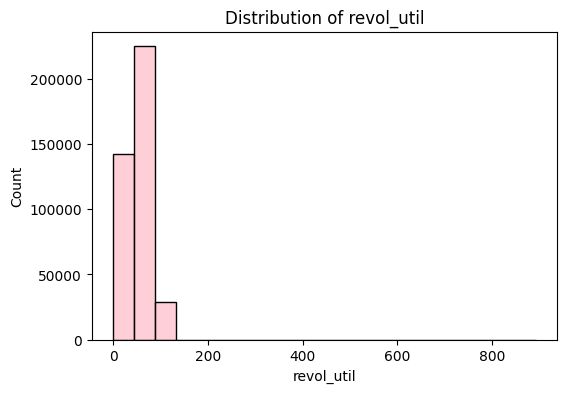

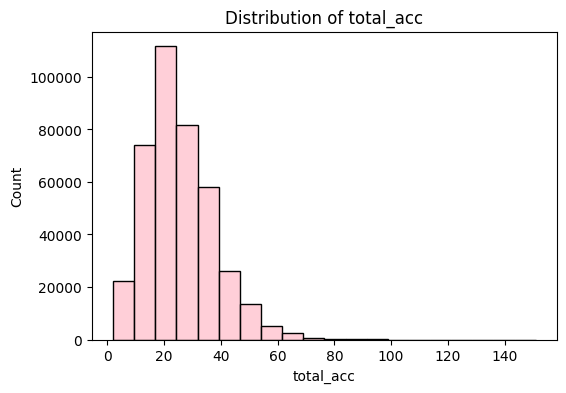

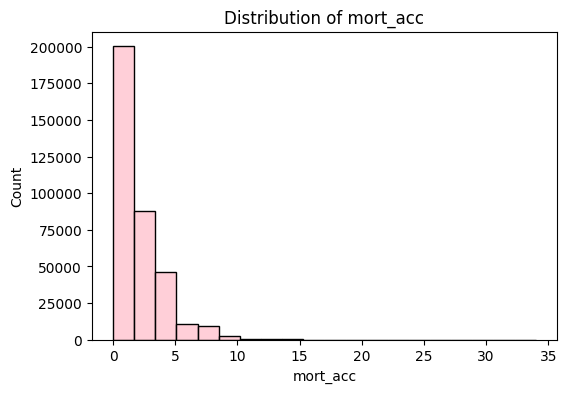

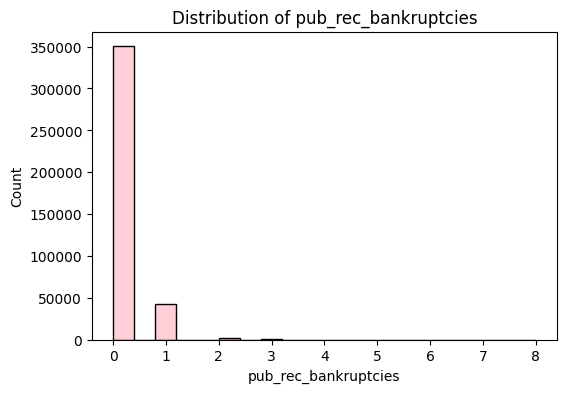

In [11]:
for column in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[column],bins=20,color='pink')
    plt.title(f'Distribution of {column}')
    plt.show()

##### Here, we see the distribution of the data for each column. First, I separated the numerical columns into one variable named "numerical_columns".
##### After that, I used a for loop to examine the distribution of each column in "numerical_columns". For plotting,
##### I used sns.histplot, specified the size of the figure, and set the title using plt.title(). Finally, I used plt.show() to display the plots 

##### our code generates and displays separate histograms for each numerical column. each histogram showing the distribution of the data in that column

## After that, we identify the distribution for categorical columns

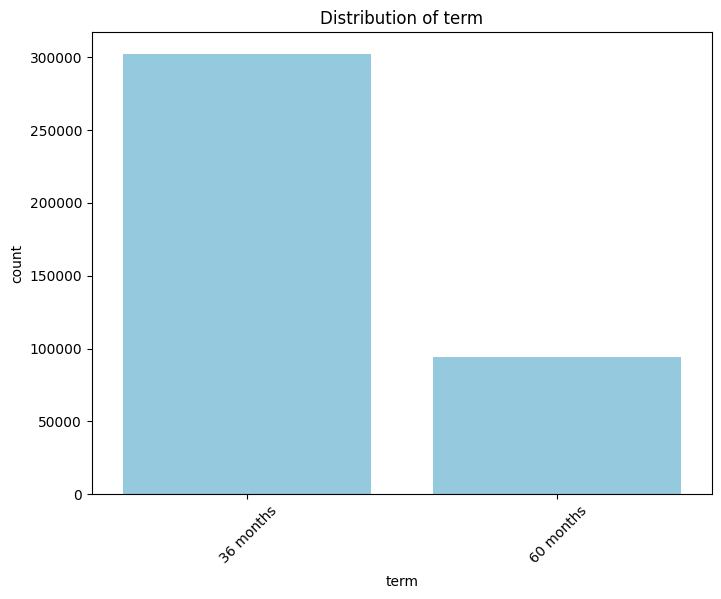

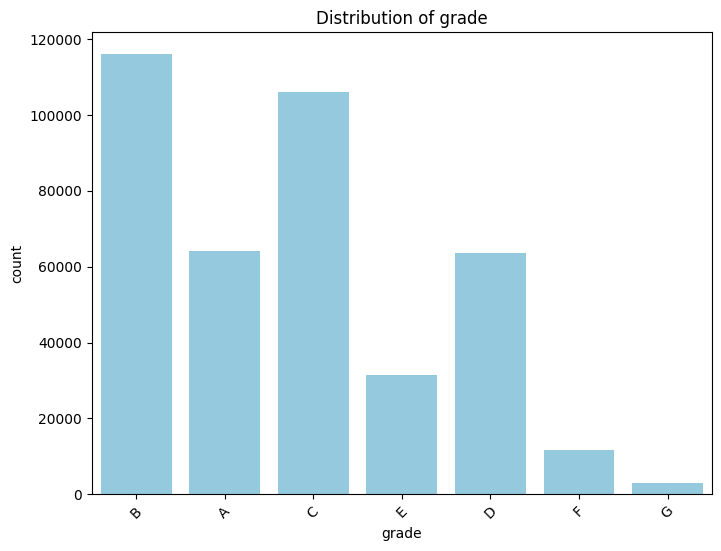

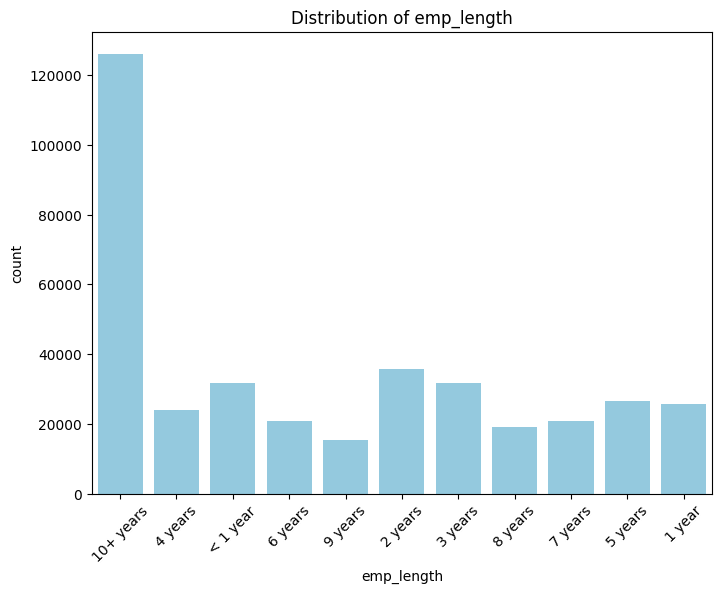

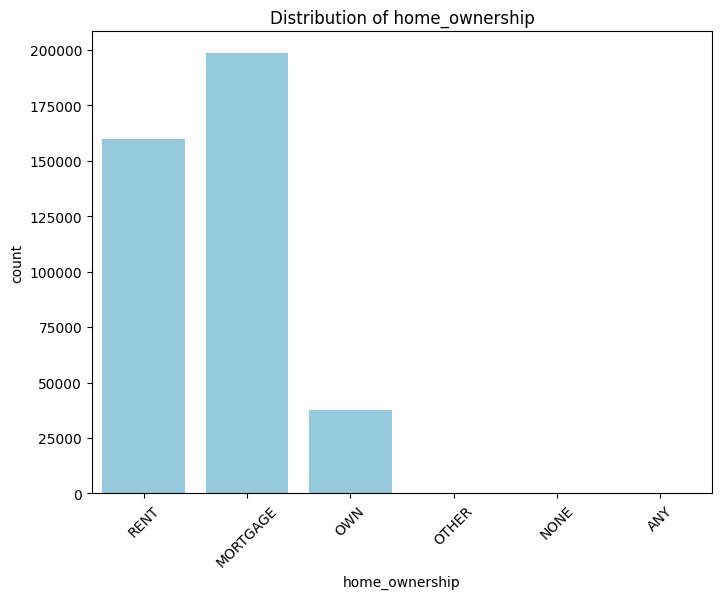

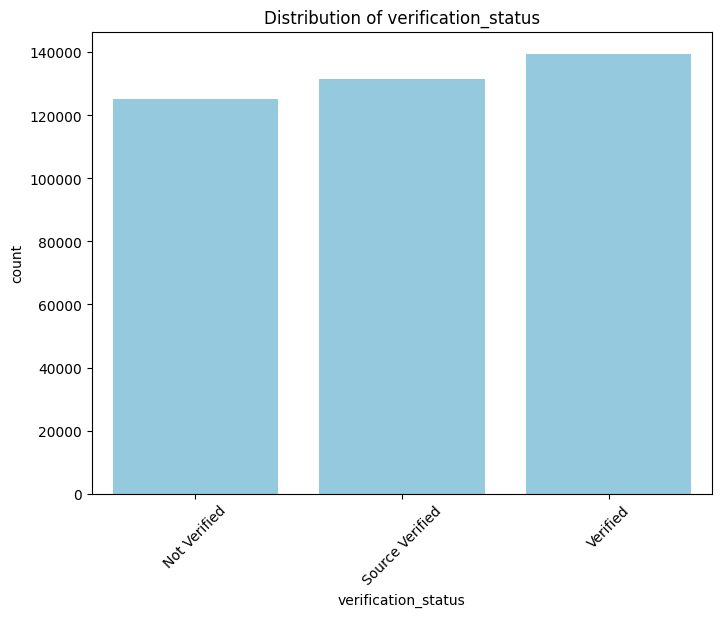

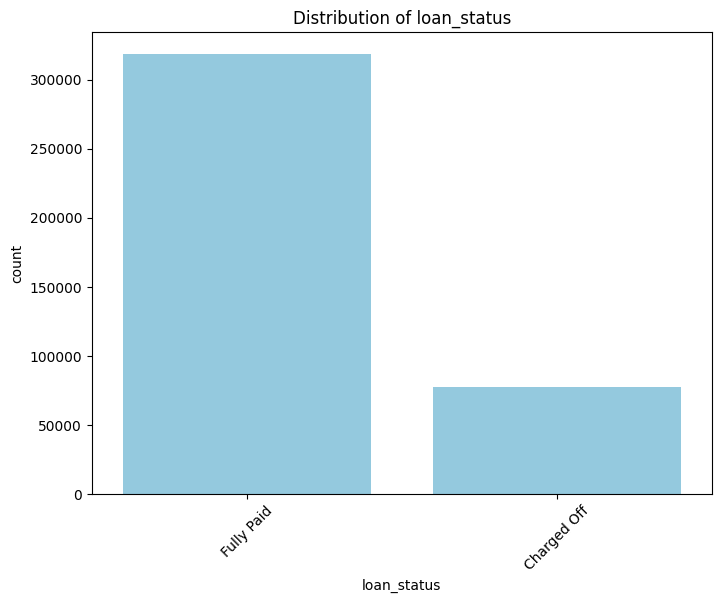

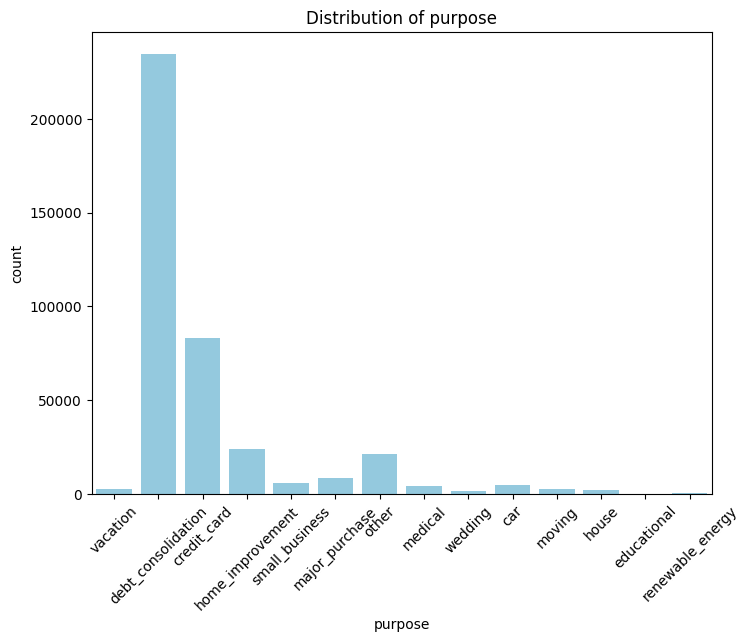

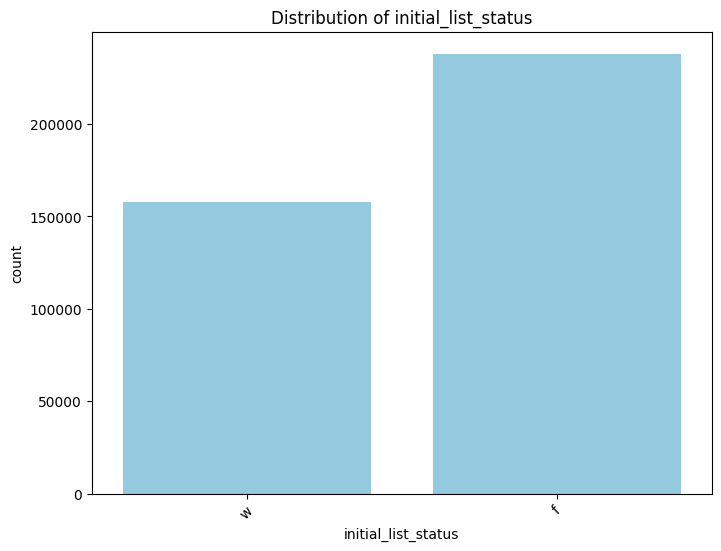

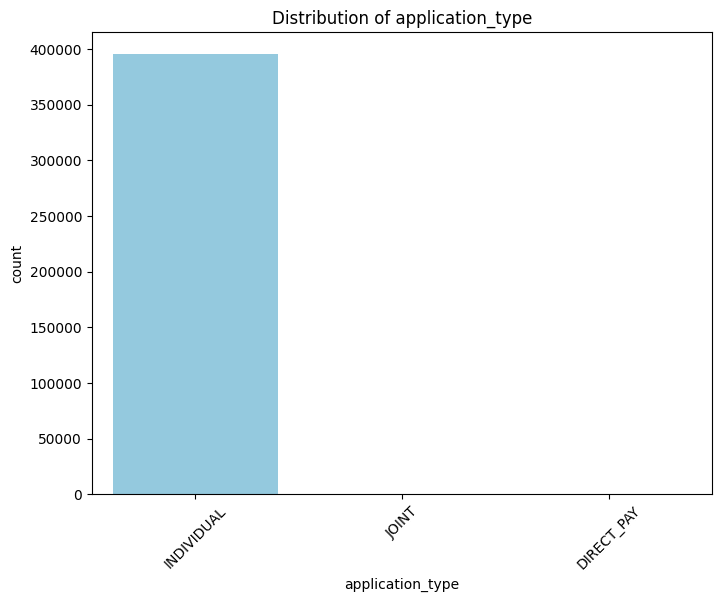

In [12]:
for i in categorical_columns:
    if df[i].nunique()<=15:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=df[i], color='skyblue')
        plt.title(f'Distribution of {i}')
        plt.xticks(rotation=45)
        plt.show()
        


##### Here, we see the distribution of the data for each column. First, I separated the categorical columns into one variable named "categorical_columns".
##### After that, I used a for loop to examine the distribution of each column in "categorical_columns". In the for loop, I used an if condition to check if the column has 15 or fewer unique values. If this condition is true, I create a count plot for these columns.
##### I used countplot to see the distribution of the data for each column. I specified the size of the figure and set the title using plt.title(). Finally, I used plt.show() to display the plots.
##### Our code generates and displays a separate count plot for each categorical column, with each count plot showing the distribution of the data in that column

## After that , I Performed Bivariate Analysis

###  Bivariate analysis between categorical variables

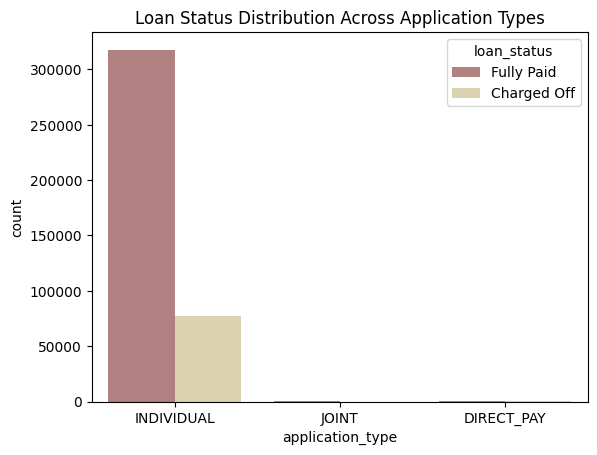

In [13]:
sns.countplot(x=df['application_type'],hue=df['loan_status'],palette="pink")
plt.title('Loan Status Distribution Across Application Types')
plt.show()

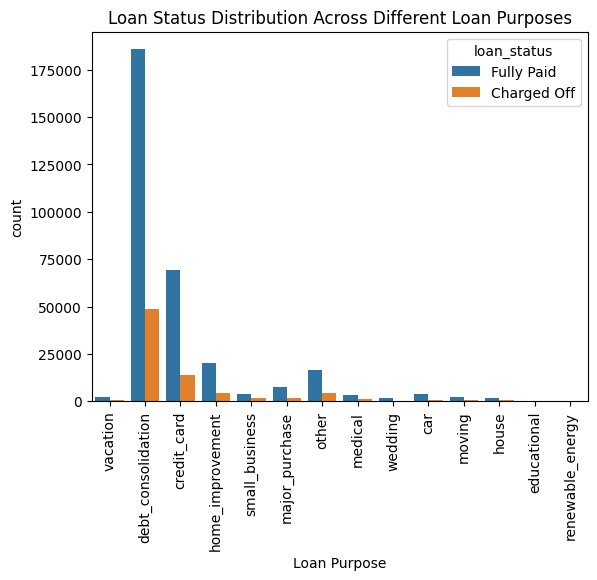

In [14]:
sns.countplot(x=df['purpose'],hue=df['loan_status'])
plt.xticks(rotation=90)
plt.xlabel('Loan Purpose')
plt.title('Loan Status Distribution Across Different Loan Purposes')
plt.show()              

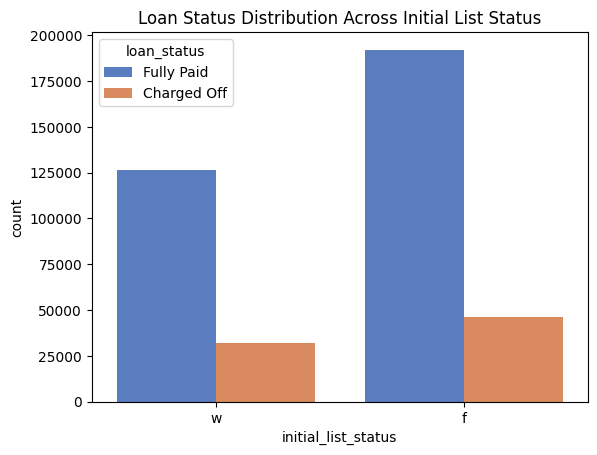

In [15]:
sns.countplot(x=df['initial_list_status'],hue=df['loan_status'],palette="muted")
plt.title('Loan Status Distribution Across Initial List Status')
plt.show()

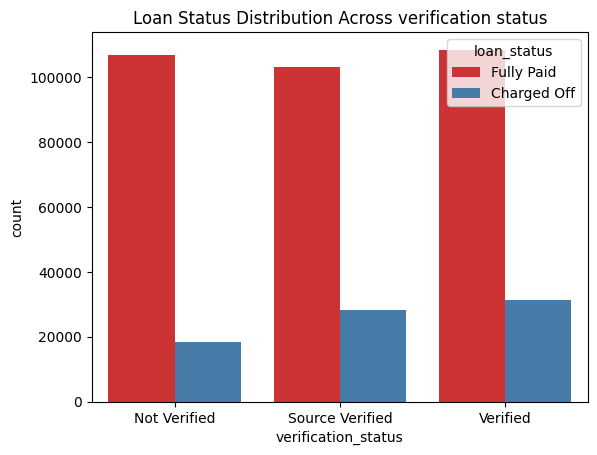

In [16]:
sns.countplot(x=df['verification_status'],hue=df['loan_status'],palette="Set1")
plt.title('Loan Status Distribution Across verification status')
plt.show()

##### Here, I performed bivariate analysis between categorical columns.

##### For this, I used countplot and created a count plot to visualize the distribution of loan statuses across different attributes.

##### sns.countplot is used to create the count plot.

##### x=df['attributes']: The x-axis represents the different attributes in my data.

##### hue=df['loan_status']: It creates a count plot based on the loan status, allowing  to see the distribution of loan statuses within each attribute category.

##### palette="Set1": This sets the color palette to "Set1", which is a predefined color set in Seaborn.

##### plt.title(): This sets the title of the plot.

##### plt.show(): This displays the plot

##  Bivariate analysis between numerical variables

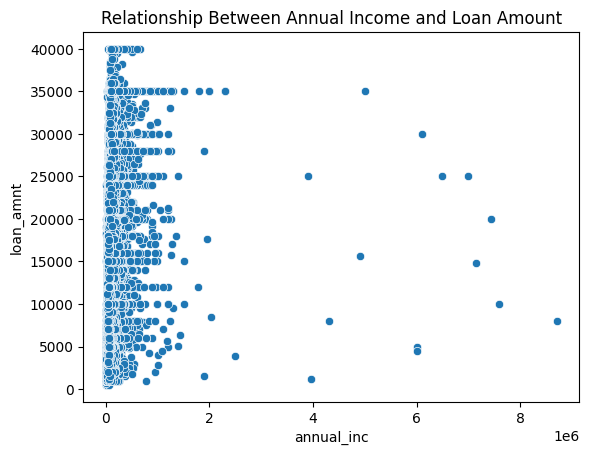

In [17]:
sns.scatterplot(x='annual_inc', y='loan_amnt', data=df)
plt.title('Relationship Between Annual Income and Loan Amount')
plt.show()

##### We created a scatter plot to visualize the relationship between two numerical variables: annual_inc and loan_amnt  .

##### The scatter plot shows a distribution of data points for these numerical variables

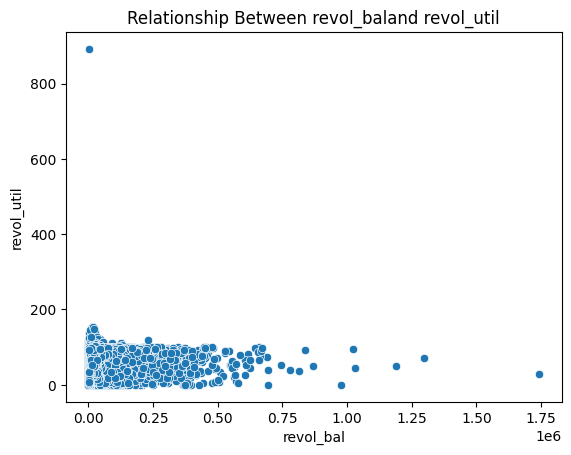

In [18]:
sns.scatterplot(x='revol_bal', y='revol_util', data=df)
plt.title('Relationship Between revol_baland revol_util')
plt.show()

##### We created a scatter plot to visualize the relationship between two numerical variables: revol_bal and revol_util  .

##### The scatter plot shows a distribution of data points for these numerical variables

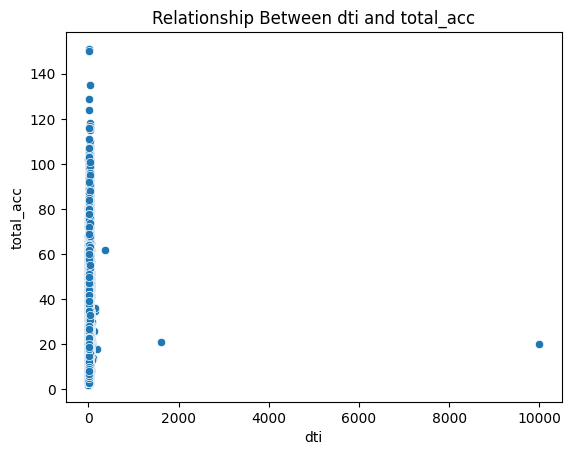

In [19]:
sns.scatterplot(x='dti', y='total_acc', data=df)
plt.title('Relationship Between dti and total_acc')
plt.show()

##### We created a scatter plot to visualize the relationship between two numerical variables: dti and total_acc .
##### The scatter plot shows a distribution of data points for these numerical variables. There is no clear linear relationship, indicating that there is no straightforward linear correlation between dti and total_acc

# 2. Data Preprocessing (30 Points)

### a. Duplicate value check

In [20]:
df.duplicated().sum()

0

There are no duplicate values in this dataset

### b. Missing value treatment

In [21]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

#### In the dataset above, there are a lot of missing values in the following columns [emp_title,emp_length ,title,revol_util ,mort_acc,pub_rec_bankruptcies]

### fill the missing values of categorical column

In [22]:
mod = df['title'].mode()
mod

0    Debt consolidation
Name: title, dtype: object

In [23]:
df['title'].fillna(mod[0] , inplace=True)

In [24]:
mod_1=df['emp_length'].mode()
mod_1

0    10+ years
Name: emp_length, dtype: object

In [25]:
df['emp_length'].fillna(mod[0], inplace=True)

In [26]:
mod_2 = df['emp_title'].mode()
mod_2

0    Teacher
Name: emp_title, dtype: object

In [27]:
df['emp_title'].fillna(mod[0], inplace=True)

### fill the missing values of numerical column

In [28]:
med=df['mort_acc'].median()
med

1.0

In [29]:
df['mort_acc'].fillna(med , inplace=True)

In [30]:
med_1 = df['pub_rec_bankruptcies'].median()
med_1

0.0

In [31]:
df['pub_rec_bankruptcies'].fillna(med, inplace = True)

In [32]:
med_2 = df['revol_util'].median()
med_2

54.8

In [33]:
df['revol_util'].fillna(med_2 , inplace = True)

In [34]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

#### Now, all the missing values have been filled.

## c. Encoding categorical columns

In [35]:
df.select_dtypes(include='object').head(1)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"


#### In this dataset, loan_status is our target variable, so we are encoding it using the .apply() method.

In [36]:
df['loan_status']=df['loan_status'].apply(lambda x :1 if x=='Fully Paid' else 0)

In [37]:
df['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

#### Apply target encoding to convert categorical data into numerical data

In [38]:
categorical=df.select_dtypes(include='object')

In [39]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=categorical)
df_new = encoder.fit_transform(df, df['loan_status'])
df_new


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0.842254,11.44,329.48,0.874270,0.861607,0.752860,0.815814,0.773378,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0.799245,0.803913,0.0,0.0,0.829389
1,8000.0,0.842254,11.99,265.68,0.874270,0.844963,0.782678,0.807615,0.830439,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0.806940,0.803913,3.0,0.0,0.829389
2,15600.0,0.842254,10.49,506.97,0.874270,0.876646,0.808007,0.793128,0.773378,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0.806940,0.803913,0.0,0.0,0.829389
3,7200.0,0.842254,6.49,220.65,0.937121,0.951814,0.829389,0.810806,0.773378,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0.806940,0.803913,0.0,0.0,0.829389
4,24375.0,0.680585,17.27,609.33,0.788191,0.754933,0.699281,0.799530,0.830439,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0.806940,0.803913,1.0,0.0,0.699281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,0.680585,10.99,217.38,0.874270,0.861607,0.829389,0.806738,0.773378,40000.0,...,6.0,0.0,1990.0,34.3,23.0,0.799245,0.803913,0.0,0.0,0.829389
396026,21000.0,0.842254,12.29,700.42,0.788191,0.826304,0.779570,0.807813,0.830439,110000.0,...,6.0,0.0,43263.0,95.7,8.0,0.806940,0.803913,1.0,0.0,0.829389
396027,5000.0,0.842254,9.99,161.32,0.874270,0.901418,0.731997,0.815814,0.773378,56500.0,...,15.0,0.0,32704.0,66.9,23.0,0.806940,0.803913,0.0,0.0,0.829389
396028,21000.0,0.680585,15.31,503.02,0.788191,0.802480,0.829389,0.815814,0.830439,64000.0,...,9.0,0.0,15704.0,53.8,20.0,0.806940,0.803913,5.0,0.0,0.829389


## d. Outlier treatment

In [40]:
for i in df_new:
    # Calculate the IQR (Interquartile Range)
    Q1 = df_new[i].quantile(0.25)
    Q3 = df_new[i].quantile(0.75)
    IQR = Q3 - Q1

    # Capping the outliers
    df_new[i] = df_new[i].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))

# e. Check for imbalance dataset and balancing it

In [41]:
print(df_new['loan_status'].value_counts())

loan_status
1    396030
Name: count, dtype: int64


In [42]:
df_new['loan_status'].fillna(0, inplace=True)

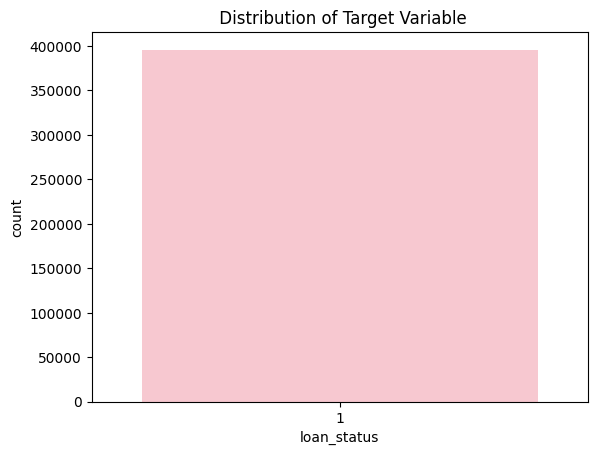

In [43]:
sns.countplot(x='loan_status', data=df_new,color='pink')
plt.title(' Distribution of Target Variable')
plt.show()

We can see that our data is an imbalanced dataset with 'Fully Paid' as the majority class and 'Charged Off' as the minority class.

### we Apply Balancing Techniques SMOTE    

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [45]:
print('Before SMOTE:')
print(df_new['loan_status'].value_counts())

Before SMOTE:
loan_status
1    396030
Name: count, dtype: int64


In [46]:
x = df_new.drop('loan_status', axis=1)
y = df['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [47]:
smt = SMOTE()

In [48]:
x_train_balance, y_train_balance = smt.fit_resample(x_train, y_train)

In [49]:
print('After Oversampling:')
print(y_train_balance.value_counts())

After Oversampling:
loan_status
1    254728
0    254728
Name: count, dtype: int64


Now the data has become a balanced dataset

# f. Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
x_train_balance = scaler.fit_transform(x_train_balance)

In [53]:
x_train_balance

array([[ 1.24860921e+00, -4.44089210e-16, -1.41195705e+00, ...,
         1.34005378e+00,  0.00000000e+00,  5.55111512e-16],
       [-2.95833018e-01, -4.44089210e-16, -1.52809214e+00, ...,
         7.81034397e-01,  0.00000000e+00,  5.55111512e-16],
       [ 1.03476336e+00, -4.44089210e-16, -1.11243995e-01, ...,
         2.22015020e-01,  0.00000000e+00,  5.55111512e-16],
       ...,
       [-6.80931740e-01, -4.44089210e-16,  9.81857348e-01, ...,
        -8.96023736e-01,  0.00000000e+00,  5.55111512e-16],
       [ 7.26483356e-01, -4.44089210e-16,  4.43725416e-01, ...,
        -1.63722939e-01,  0.00000000e+00,  5.55111512e-16],
       [-1.57261400e-02, -4.44089210e-16, -1.66444286e-01, ...,
        -4.15756134e-01,  0.00000000e+00,  5.55111512e-16]])

In [54]:
x_test=scaler.transform(x_test)

# 3. Model building (10 Points)

## a. Build the Logistic Regression model

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression()

In [57]:
model.fit(x_train_balance, y_train_balance)

LogisticRegression()

#### we are using our trained model to make predictions on our test data

In [58]:
y_pred= model.predict(x_test)

In [59]:
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [60]:
print("Training Accuracy:",model.score(x_train_balance, y_train_balance))

Training Accuracy: 0.8238356207405546


In [61]:
print("Test Accuracy:",model.score(x_test,y_test))

Test Accuracy: 0.8127414589803803


## b. Display model coefficients with column names

In [62]:
coefficients = model.coef_[0]
feature_names = x.columns

In [63]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

coef_df.reset_index()

,index,Feature,Coefficient
0,6,emp_title,1.640050e+00
1,3,installment,6.191544e-01
2,13,title,5.282356e-01
3,11,issue_d,1.838112e-01
4,5,sub_grade,1.629134e-01
5,8,home_ownership,1.377990e-01
6,23,mort_acc,9.987284e-02
7,18,revol_bal,5.748188e-02
8,15,earliest_cr_line,5.406711e-02
9,20,total_acc,4.521038e-02


These are the model coefficients along with the column names

# 4. Results Evaluation (40 Points)

## a. Confusion Matrix and comments

In [64]:
# importing libraries for confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Confusion Matrix: [[12391  3186]
 [11646 51983]]


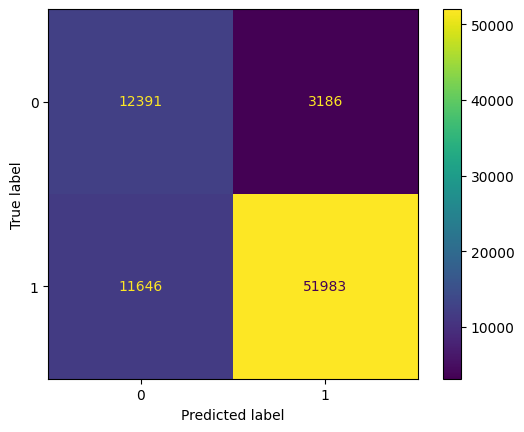

In [65]:
# Calculating the confusion matrix using y_test and y_pred

conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix

print(f"Confusion Matrix: {conf_matrix}")

# Displaying the calculated confusion matrix

ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

In [66]:
# Calculating the accuracy by dividing the sum of diagonal elements (correct predictions) by the total sum of the confusion matrix

np.diag(conf_matrix).sum() / conf_matrix.sum()

0.8127414589803803

##### This is same as the test accuracy we calculated above

In [67]:
#importing libraries for precision , recall scores and f1_scor

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [68]:
# Calculating precision score

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculating recall score

recall = recall_score(y_test, y_pred) 
print(f"Recall: {recall}")

# Calculating F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")


Precision: 0.9422501767296851
Recall: 0.8169702494145751
F1 Score: 0.875149413289786


#### Comments on the confusion matrix

##### firstly, i imported  libraries to create and display a confusion matrix.
##### Calculating the confusion matrix using y_test and y_pred, then plotting the confusion matrix and displaying it using Matplotlib.
##### Calculating the accuracy by dividing the sum of diagonal elements by the total sum of the confusion matrix.
##### Importing libraries to calculate precision scores, recall scores, and F1 Scores.

##### Precision: Precision measures the accuracy of the positive predictions.

##### Recall: Recall measures how well our model can identify all the actual positive cases in our data.

##### F1 Score: The F1 Score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.

##### After that, i calculated the precision score, which shows that 94.2% of the positive predictions made by my model are correct. Then, I calculated 

##### the recall score, which indicates that my model correctly identifies 81.7% of all actual positive cases. Last but not least, I calculated the F1 

##### score, which balances the two metrics (precision and recall) and demonstrates that my model performs well overall.


### b. Classification Report and comments

In [69]:
# importing the classification_report function from sklearn.metrics

from sklearn.metrics import classification_report

# Generating the classification report using y_test and y_pred

report = classification_report(y_test, y_pred)

# Printing the classification report

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.80      0.63     15577
           1       0.94      0.82      0.88     63629

    accuracy                           0.81     79206
   macro avg       0.73      0.81      0.75     79206
weighted avg       0.86      0.81      0.83     79206



### Comments on the Classification Report

##### Firstly, I imported the classification_report function from the sklearn.metrics module, which is used to create a detailed report showing the main

##### classification metrics. After that, I generated the classification report using y_test and y_pred. This report includes precision, recall, F1

##### score, and support for each class. Finally, I printed the classification report to the console, providing a summary of the performance metrics for my model.

## c. AU-ROC Curve & comments     

In [70]:
# Importing libraries for ROC curve and AUC score calculation

from sklearn.metrics import roc_curve, roc_auc_score, auc

In [71]:
# Predicting the probabilities for the test data

probability = model.predict_proba(x_test)
probability

array([[0.93664669, 0.06335331],
       [0.81916529, 0.18083471],
       [0.19989291, 0.80010709],
       ...,
       [0.63682542, 0.36317458],
       [0.14183556, 0.85816444],
       [0.11306849, 0.88693151]])

In [72]:
# Extracting the probabilities of the positive class 

probabilites = probability[:,1]
probabilites

array([0.06335331, 0.18083471, 0.80010709, ..., 0.36317458, 0.85816444,
       0.88693151])

In [73]:
# Calculating the false positive rates, true positive rates, and thresholds for the ROC curve

fpr, tpr, thr = roc_curve(y_test,probabilites)

In [74]:
#Printing the FPR , TPR and Threshold

print(f'FPR:\n {fpr}\n\n\n')
print(f'TPR:\n {tpr}\n\n\n')
print(f'Threshold:\n {thr}')

FPR:
 [0.        0.        0.        ... 0.9976247 0.9976247 1.       ]



TPR:
 [0.00000000e+00 1.57161043e-05 5.65779755e-04 ... 9.99984284e-01
 1.00000000e+00 1.00000000e+00]



Threshold:
 [       inf 0.99969667 0.99854793 ... 0.00509143 0.00507023 0.00170003]


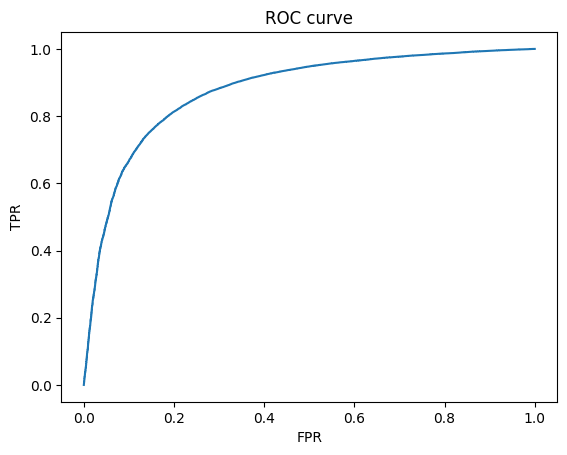

In [75]:
# Plotting the ROC curve

plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [76]:
# Calculating the AUC score

roc_auc_score(y_test,probabilites)

0.8776815935895277

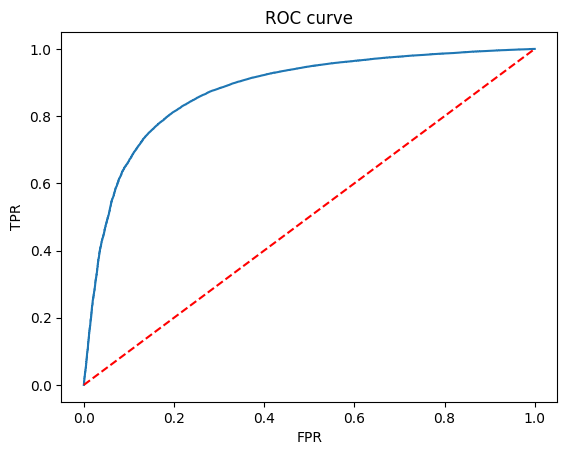

In [77]:
#Plotting the ROC curve with the line of baseline

plt.plot(fpr, tpr)
plt.plot(fpr, fpr,'--', color='red')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Comments on the AU-ROC Curve

##### I imported the libraries  to calculate and plot the ROC curve and AUC score. Then, I used the trained model to predict probabilities for the test data (x_test). After that, I extracted the probabilities of the positive class from the predicted probabilities. Next, I calculated the false positive rates (fpr), true positive rates (tpr), and thresholds (thr) for the ROC curve using the y_test and the predicted probabilities.

##### I plotted the ROC curve using the false positive rates and true positive rates, with the x-axis representing the false positive rate (FPR) and the y-axis representing the true positive rate (TPR). I calculated the Area Under the Curve (AUC) score and printed it. The AUC score summarizes the overall performance of the ROC curve.

##### I plotted the ROC curve for my model and also added a baseline, which is a straight diagonal line from the bottom left to the top right of the plot. This baseline represents a model that is just guessing randomly. If your ROC curve is above this line, it means your model is making better predictions than random guessing. (Random guessing means predicting without using any real information.)

### d. Precision Recall Curve & comments

In [78]:
# Importing libraries  to calculate the Precision-Recall curve and AUC

from sklearn.metrics import precision_recall_curve,auc

In [79]:
# Calculate precision, recall, and thresholds

precision, recall, thr = precision_recall_curve(y_test, probabilites)

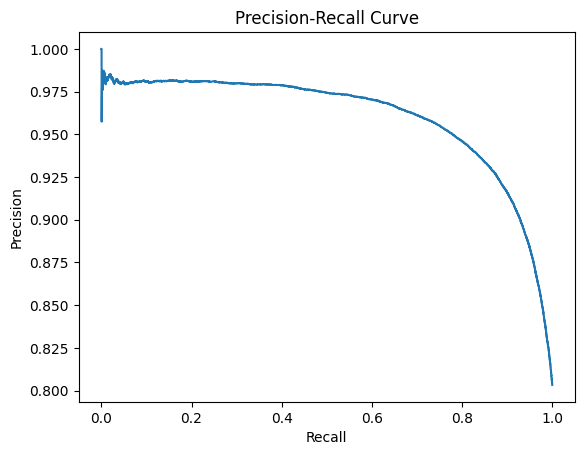

In [80]:
# Plot the Precision-Recall curve

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [81]:
# Calculate the AUC for the Precision-Recall curve

pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc}')


Precision-Recall AUC: 0.9601354754134498


## Comments on the Precision Recall Curve

##### First, I imported libraries to calculate the Precision-Recall curve and AUC. After that, I calculated precision, recall, and thresholds using the 

##### y_test and predicted probabilities. Then, I plotted the Precision-Recall curve with recall on the x-axis and precision on the y-axis. The title is

##### set to "Precision-Recall Curve". Finally, I calculated the Area Under the Curve (AUC) for the Precision-Recall curve and printed the result.